Accuracy:  0.5933333333333334


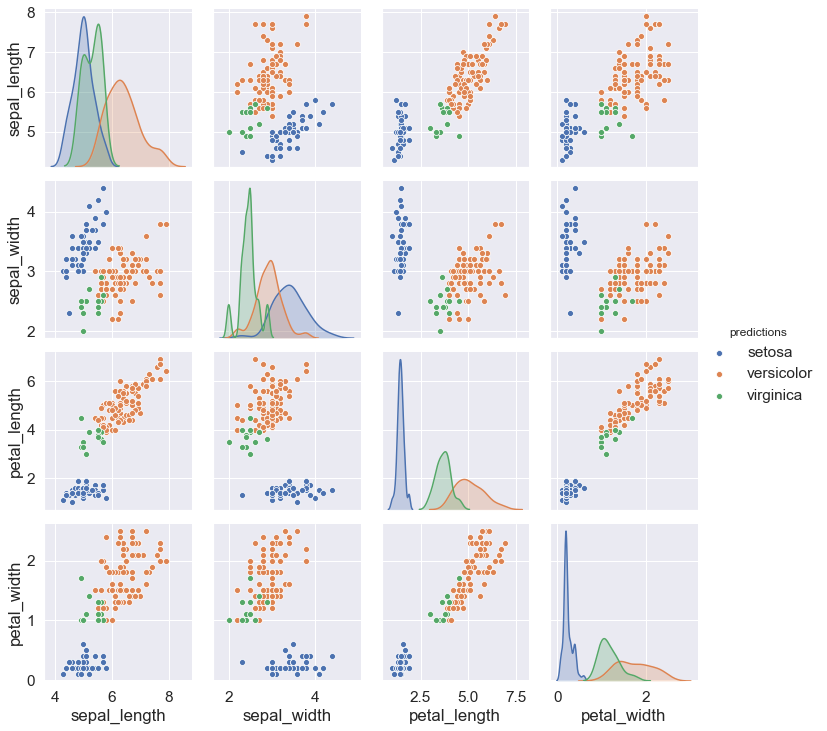

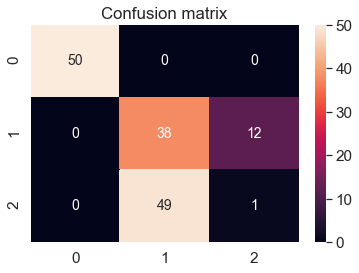

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline
from sklearn.metrics import accuracy_score
import random
from sklearn.metrics import confusion_matrix

iris = datasets.load_iris()

X = iris.data
y = iris.target

iris_data = pd.DataFrame(X)
iris_data['target'] = pd.Series(y)
iris_data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width','species']

X_train = iris_data[list(iris_data.columns[:-1])]

def euclidian_distance(x, y): # to find the eculidian distance between x and y
    x1 = np.array(list(x))
    y1 = np.array(list(y))
    return np.sqrt(np.sum(np.square(x1 - y1)))

def KmeansCluster(df, clusters=3):
    total_samples = df.shape[0]

    random_indices = random.sample(list(range(total_samples)), clusters) # choose k random points and make them centers
    current_centers = df.loc[random_indices, :]
    
    nodes_assignment = np.zeros(total_samples) # assign label to each of the observation points
    old_nodes_assignment = np.copy(nodes_assignment)
    
    for iteration in range(200000):
        for i in range(total_samples): # assigning group to every data point 
            current_assignment = 0
            for j in range(clusters):
                current_distance = euclidian_distance(df.loc[df.index[i], :],
                        current_centers.loc[current_centers.index[current_assignment], :])
                new_distance = euclidian_distance(df.loc[df.index[i], :],
                         current_centers.loc[current_centers.index[j], :])
                if new_distance < current_distance:
                    current_assignment = j
            nodes_assignment[i] = current_assignment

        if np.sum(old_nodes_assignment == nodes_assignment) == df.shape[0]:
            break
        old_nodes_assignment = np.copy(nodes_assignment)
     
    # post-processing results

    nodes_assignment = list(nodes_assignment)
    nodes_assignment = [int(x) for x in nodes_assignment]
    return (nodes_assignment)

predictions = KmeansCluster(X_train,3)

score = accuracy_score(y, predictions)
print('Accuracy: ', score)

newframe = iris_data[list(iris_data.columns[:-1])]
label_classes = ['setosa','versicolor','virginica']
newframe["predictions"] = pd.Series([label_classes[i] for i in predictions])
sns.pairplot(newframe, hue='predictions')
plt.show()

################### Confusion matrix

matrix = confusion_matrix(y, predictions)
sns.set(font_scale=1.4) # for label size
sns.heatmap(matrix, annot=True, annot_kws={"size": 14}) # font size
plt.title("Confusion matrix")
plt.show()